In [1]:
%load_ext autoreload
%autoreload 2
    
from manager import * 
import rosnode
import time
from env_utils.algo_constants import *


In [2]:
if '/manager' in rosnode.get_node_names():
    # print("Manager is running")
    rosnode.kill_nodes(['manager'])
    time.sleep(1)

m = Manager([FAKE_ARM, FAKE_PXRF])
# m.fake_pxrf_values = [0.13, 0.2, 0.0, 0.5, 0.6, 0.05]
m.fake_pxrf_values = [0.13, 0.2, 0.0, 0.5, 0.02, 0.5, 0.32]



 | Waiting for move_base server
[INFO] [1725919733.643321]: GPS Full Navigation Achieved!
[INFO] [1725919733.647532]:  | Algorithm Set to ADAPTIVE with number of samples = 16
[INFO] [1725919733.648442]: ----------- READY -----------


[WARN] [1725919733.645559]: >>> USING FAKE HARDWARE <<<<
[WARN] [1725919733.646585]: Fake Hardware Flags: ['fake_arm', 'fake_pxrf']


| Reset 
[INFO] [1725919747.539083]: ----------------
 Boundary Points:
 [(40.4421389727242, -79.94606451477283), (40.44226777271023, -79.94601767225954), (40.44225684772099, -79.94596403002659), (40.44213264771853, -79.94603013841227)]
----------------
[INFO] [1725919748.170354]: Width: 9 m | 36 cells
[INFO] [1725919748.171727]: Height: 16 m | : 64 cells
[INFO] [1725919748.172698]: Start: (2.2620907380478457, 2.3502929918468) m | (8, 8) cells
[INFO] [1725919748.173532]: Boundary Offset (MAP): [[0.0, 0.6672946196049452], [3.802040228853002, 15.011726554483175], [8.365844454383478, 13.85332749504596], [2.9238006082596257, 0.0]]
[INFO] [1725919748.174590]: Boundary Offset (GRID): [(0, 1), (14, 59), (32, 54), (10, 0)]
[INFO] [1725919748.193264]: lengths of x1 | x2 | x1x2: 36 | 64 | (2304, 2) 


In [4]:
if (m.status != SCANNING and 
    m.status != ARM_RETURNED and 
    m.status != ERROR):
    m.run_once()

[INFO] [1725919172.687482]: ----------- Manager Loop: adaptive -----------
[INFO] [1725919172.690097]:  | Goal Sent to movebase...
[INFO] [1725919192.841409]:  | Movebase Goal Reached
[INFO] [1725919192.842474]: ----------- Manager Loop END -----------


In [4]:
for i in range(0,20):
    if (m.status != SCANNING and
        m.status != ERROR):
        m.run_once()

[INFO] [1725919825.397010]: ----------- Manager Loop: adaptive -----------
[INFO] [1725919825.528841]:  | Sending Adaptive Algorithm Location (GPS|Map|Grid): (40.44216972862946, -79.94602129122296) | (3.625, 4.125) | [14, 16] 
[INFO] [1725919825.560624]:  Next Scan Location: [14, 16]
[INFO] [1725919825.561546]: ----------- Manager Loop END -----------
[INFO] [1725919825.563061]: ----------- Manager Loop: adaptive -----------
[INFO] [1725919825.565421]:  | Goal Sent to movebase...
[INFO] [1725919843.266276]:  | Movebase Goal Reached
[INFO] [1725919843.267685]: ----------- Manager Loop END -----------
[INFO] [1725919843.269262]: ----------- Manager Loop: adaptive -----------
PXRF Mean Value: 0.13
[INFO] [1725919843.270240]: ----------- Manager Loop END -----------
[INFO] [1725919843.271738]: ----------- Manager Loop: adaptive -----------
[INFO] [1725919843.345356]:  | Updating GPR with value=0.13 at (GPS|Map|Grid): (40.44216766186511, -79.94602007648515) | (3.7279889220371842, 3.89477260

/home/patrick/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[INFO] [1725919843.503790]:  | Sending Adaptive Algorithm Location (GPS|Map|Grid): (40.44217897808025, -79.94604767699235) | (1.375, 5.125) | [5, 20] 
[INFO] [1725919843.534957]:  Next Scan Location: [5, 20]
[INFO] [1725919843.535893]: ----------- Manager Loop END -----------
[INFO] [1725919843.537445]: ----------- Manager Loop: adaptive -----------
[INFO] [1725919843.539398]:  | Goal Sent to movebase...
[INFO] [1725919861.390587]:  | Movebase Goal Reached
[INFO] [1725919861.391911]: ----------- Manager Loop END -----------
[INFO] [1725919861.393385]: ----------- Manager Loop: adaptive -----------
PXRF Mean Value: 0.2
[INFO] [1725919861.394466]: ----------- Manager Loop END -----------
[INFO] [1725919861.396104]: ----------- Manager Loop: adaptive -----------
[INFO] [1725919861.465555]:  | Updating GPR with value=0.2 at (GPS|Map|Grid): (40.44217714776949, -79.94604715421391) | (1.4201948274858296, 4.925055397674441) | (4, 18) 


/home/patrick/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[INFO] [1725919861.595420]:  | Sending Adaptive Algorithm Location (GPS|Map|Grid): (40.442151982199064, -79.94605104645782) | (1.125, 2.125) | [4, 8] 
[INFO] [1725919861.628473]:  Next Scan Location: [4, 8]
[INFO] [1725919861.629355]: ----------- Manager Loop END -----------
[INFO] [1725919861.630676]: ----------- Manager Loop: adaptive -----------
[INFO] [1725919861.632734]:  | Goal Sent to movebase...
[INFO] [1725919876.833686]:  | Movebase Goal Reached
[INFO] [1725919876.835004]: ----------- Manager Loop END -----------
[INFO] [1725919876.836751]: ----------- Manager Loop: adaptive -----------
PXRF Mean Value: 0.0
[INFO] [1725919876.837932]: ----------- Manager Loop END -----------
[INFO] [1725919876.839617]: ----------- Manager Loop: adaptive -----------
[INFO] [1725919876.918276]:  | Updating GPR with value=0.0 at (GPS|Map|Grid): (40.442153550443315, -79.94605431216587) | (0.842505584936589, 2.2951824348419905) | (2, 8) 
[INFO] [1725919877.167113]:  | Sending Adaptive Algorithm Lo

/home/patrick/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:479: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


[INFO] [1725919891.159903]:  | Sending Adaptive Algorithm Location (GPS|Map|Grid): (40.44219224759152, -79.94602093947931) | (3.625, 6.625) | [14, 26] 
[INFO] [1725919891.191921]:  Next Scan Location: [14, 26]
[INFO] [1725919891.192836]: ----------- Manager Loop END -----------
[INFO] [1725919891.194033]: ----------- Manager Loop: adaptive -----------
[INFO] [1725919891.196419]:  | Goal Sent to movebase...
[INFO] [1725919902.597538]:  | Movebase Goal Reached
[INFO] [1725919902.598780]: ----------- Manager Loop END -----------
[INFO] [1725919902.600565]: ----------- Manager Loop: adaptive -----------
PXRF Mean Value: 0.02
[INFO] [1725919902.601632]: ----------- Manager Loop END -----------
[INFO] [1725919902.602982]: ----------- Manager Loop: adaptive -----------
[INFO] [1725919902.672382]:  | Updating GPR with value=0.02 at (GPS|Map|Grid): (40.44219367518547, -79.94602323709984) | (3.4282503065187484, 6.781139956787229) | (12, 26) 


/home/patrick/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:479: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


[INFO] [1725919902.851681]:  | Sending Adaptive Algorithm Location (GPS|Map|Grid): (40.44217444741412, -79.94604479995428) | (1.625, 4.625) | [6, 18] 
[INFO] [1725919902.876375]:  Next Scan Location: [6, 18]
[INFO] [1725919902.877271]: ----------- Manager Loop END -----------
[INFO] [1725919902.878681]: ----------- Manager Loop: adaptive -----------
[INFO] [1725919902.880979]:  | Goal Sent to movebase...
[INFO] [1725919922.682086]:  | Movebase Goal Reached
[INFO] [1725919922.683268]: ----------- Manager Loop END -----------
[INFO] [1725919922.684867]: ----------- Manager Loop: adaptive -----------
PXRF Mean Value: 0.5
[INFO] [1725919922.685890]: ----------- Manager Loop END -----------
[INFO] [1725919922.687181]: ----------- Manager Loop: adaptive -----------
[INFO] [1725919922.750690]:  | Updating GPR with value=0.5 at (GPS|Map|Grid): (40.44217339786025, -79.94604558914881) | (1.5581025978317484, 4.506610865704715) | (5, 17) 


/home/patrick/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:479: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


[INFO] [1725919922.911226]:  | Sending Adaptive Algorithm Location (GPS|Map|Grid): (40.44217195365131, -79.94601830866372) | (3.875, 4.375) | [15, 17] 
[INFO] [1725919922.968736]:  Next Scan Location: [15, 17]
[INFO] [1725919922.969692]: ----------- Manager Loop END -----------
[INFO] [1725919922.971203]: ----------- Manager Loop: adaptive -----------
[INFO] [1725919922.973465]:  | Goal Sent to movebase...
[INFO] [1725919934.174493]:  | Movebase Goal Reached
[INFO] [1725919934.175806]: ----------- Manager Loop END -----------


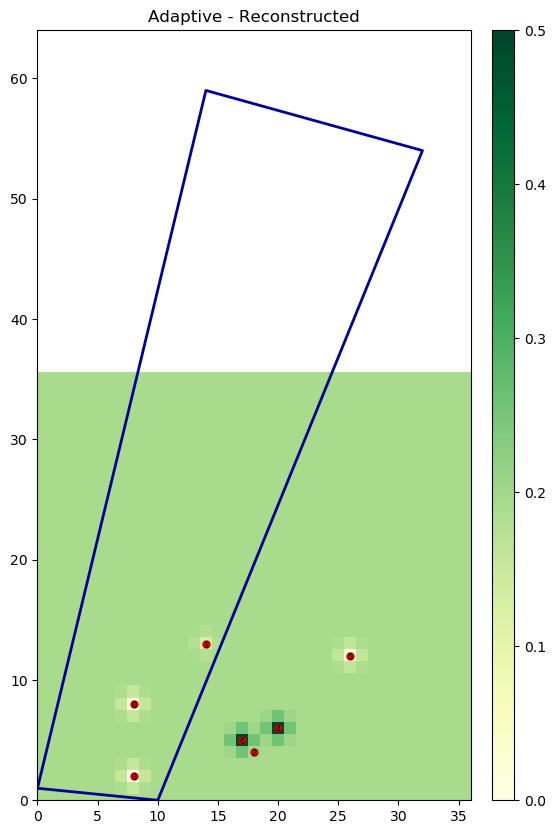

Sampled at [5, 17] with value = 0.5
Adaptive Norm Range: 0.5000


In [5]:
m.show()

In [ ]:
print(m.searchBoundary)
m.send_location_to_GUI(40.442171585082114, -79.94604942914305)

In [4]:
m.adaptiveROS.mu

NameError: name 'm' is not defined